#1. Import Pycaret

In [1]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'3.3.2'

#2. Import Library

In [3]:
import pandas as pd
from pycaret.classification import *

#3. Import Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#path_bugzilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/bugzilla.csv'
#path_columba = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/columba.csv'
#path_jdt = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/jdt.csv'
#path_mozilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/mozilla.csv'
#path_platform = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/platform.csv'
path_postgres = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/postgres.csv'

#df = pd.read_csv(path_bugzilla)
#df = pd.read_csv(path_columba)
#df = pd.read_csv(path_jdt)
#df = pd.read_csv(path_mozilla)
#df = pd.read_csv(path_platform)
df = pd.read_csv(path_postgres)

#4. Preprocessing

In [7]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,6,2004/12/31 16:58,10,107,694,0.999731,0.006990,0.006990,284.461095,0,20,70706,0.195965,1603,988.733333,1594,0
1,7,2004/8/29 0:12,10,111,755,0.999520,0.006866,0.006866,288.600000,0,20,108260,0.286093,25822,4918.773409,25556,0
2,13,2000/1/26 11:09,1,1,1,0.000000,0.025641,0.029915,234.000000,0,2,0,1.000000,13150,5202.438095,510,1
3,38,2004/4/19 20:33,2,2,8,0.861654,6.000000,6.000000,0.000000,0,7,1230,0.500000,909,874.948718,107,0
4,49,2002/8/30 9:06,1,1,1,0.000000,0.000000,0.000000,0.000000,0,3,298,1.000000,5076,521.867108,468,0


In [8]:
# Menghapus kolom yang tidak dibutuhkan
df_stats = df.drop(columns=['transactionid', 'commitdate'])

# Menghitung statistik deskriptif
df_stats.describe()




,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
count,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000,20431.000000
mean,1.300915,2.252215,4.461064,0.281925,0.064197,1.651771,853.344003,0.437228,6.865499,416.882580,0.882145,11814.767853,2970.913409,5628.287113,0.250551
std,0.700953,5.177814,26.798834,0.384581,0.306473,223.635200,950.749992,0.496056,4.164663,3519.463816,0.226145,10857.844721,2034.220630,6977.346941,0.433341
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.001582,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.005018,0.002600,254.000000,0.000000,4.000000,4.000000,0.888889,1033.000000,450.625000,294.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.015347,0.008197,567.000000,0.000000,6.000000,38.000000,1.000000,9108.000000,3950.681174,1636.000000,0.000000
75%,1.000000,2.000000,3.000000,0.689202,0.045455,0.026788,1136.200000,1.000000,10.000000,214.000000,1.000000,21676.500000,4871.379789,10396.500000,1.000000
max,11.000000,139.000000,990.000000,1.000000,25.000000,31963.000000,11326.000000,1.000000,28.000000,174659.000000,1.000000,37800.000000,6315.450000,37626.000000,1.000000


In [9]:
df['ns'].unique()

array([10,  1,  2,  5,  3,  4,  7, 11,  9,  6,  8])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


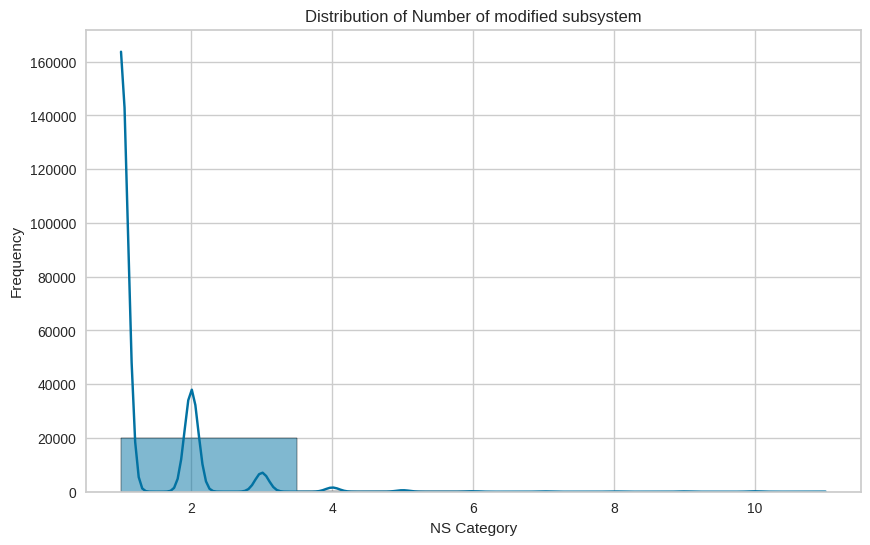

In [11]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ns'], kde=True, color="b", bins=4)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified subsystem')
plt.xlabel('NS Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [12]:
df['nm'].unique()

array([107, 111,   1,   2,  11,  17,   4,   8,   3, 106,   7, 135,  10,
       133,  20,  15,  18,  14,  16,   6,  12,   5,   9, 122,  33,  34,
        51,  32,  87, 100,  35,  98, 127,  96,  24,  36, 139,  28,  27,
        94, 109,  60,  70,  31,  26,  39,  53,  21,  23,  29,  25,  19,
       114,  43,  38,  48, 123,  13,  80, 125,  22,  77,  79,  52,  37,
        41,  76,  81,  68,  40,  54,  30,  44,  47])

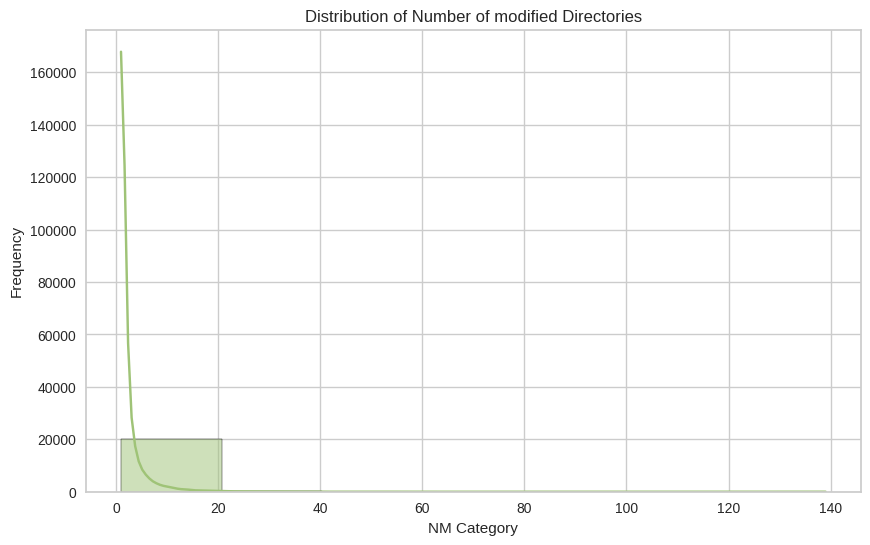

In [13]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nm'], kde=True, color="g", bins=7)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Directories')
plt.xlabel('NM Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [14]:
df['nf'].unique()

array([694, 755,   1,   8,   6,  16,  23,   2,   5,   9,   4, 502, 990,
        11,   3, 960,  32,  27,  30, 831,  22, 794,  18,  15,  46,  10,
        21,  52,  20,  14,   7,  61,  19,  60,  29,  12, 907,  17, 104,
        28, 361,  96,  93, 434, 412, 418,  86, 632, 687,  43, 654,  99,
       403,  57, 113, 527, 770, 522, 224, 413, 524,  64,  97,  58,  70,
        53,  54,  68,  66,  37,  38,  36,  59, 555,  85, 554, 486, 145,
        24, 108,  26,  48,  33,  41, 124, 446, 598, 100, 818,  75,  13,
        39,  56,  65,  34, 264, 109,  47, 591,  25,  35,  50,  49,  73,
        44, 238,  40,  51,  31,  77, 194,  42, 116, 206, 236, 613, 101,
       573, 325, 118,  98, 160, 186, 123, 256, 647, 210, 246,  71, 608,
        63,  79,  62,  81,  80,  74,  55,  82,  45])

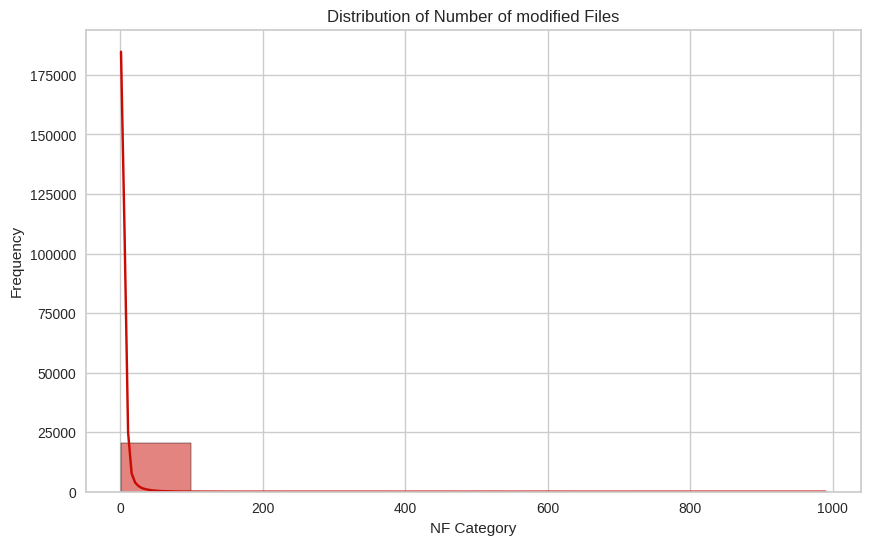

In [15]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nf'], kde=True, color="r", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Files')
plt.xlabel('NF Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [16]:
df['entropy'].unique()

array([0.99973066, 0.99952045, 0.        , ..., 0.93712731, 0.69719607,
       0.87622   ])

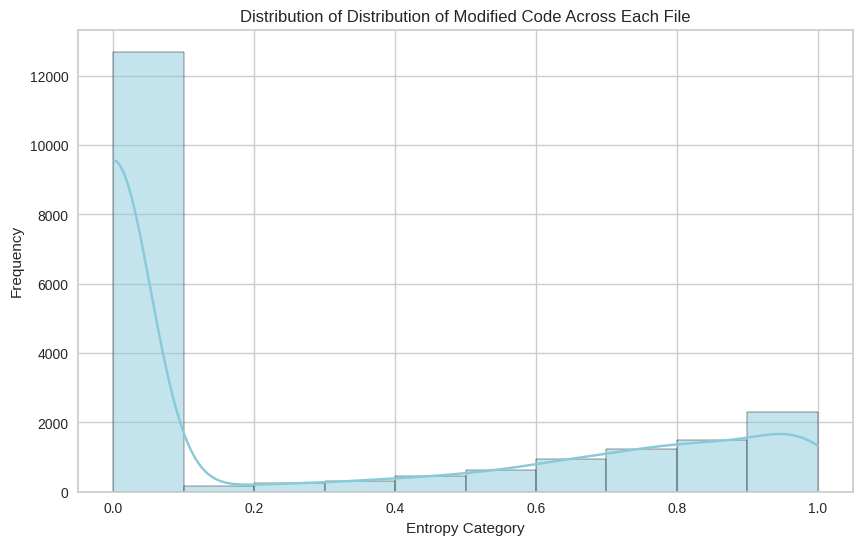

In [17]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['entropy'], kde=True, color="c", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Distribution of Modified Code Across Each File')
plt.xlabel('Entropy Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [18]:
df['la'].unique()

array([0.00699032, 0.00686576, 0.02564103, ..., 0.2826087 , 0.29251701,
       1.71428571])

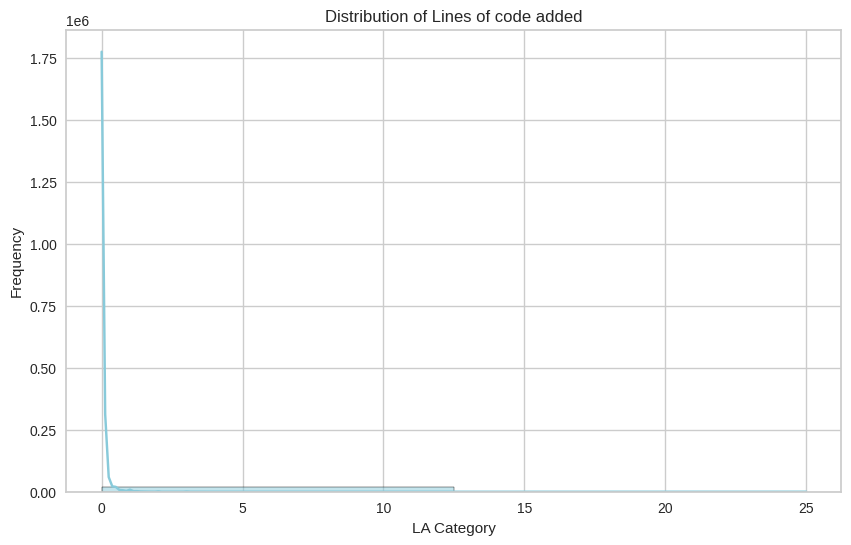

In [19]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['la'], kde=True, color="c", bins=2)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code added')
plt.xlabel('LA Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [20]:
df['ld'].unique()

array([6.9903150e-03, 6.8657550e-03, 2.9914530e-02, ..., 4.5379538e-02,
       1.0800000e+02, 1.2500000e+02])

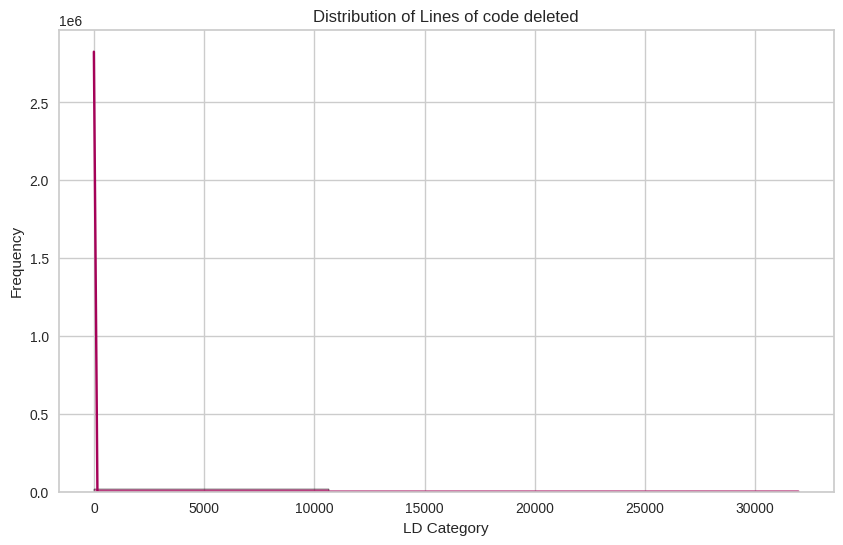

In [21]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ld'], kde=True, color="m", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code deleted')
plt.xlabel('LD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [22]:
df['lt'].unique()

array([284.4610951 , 288.6       , 234.        , ..., 698.75      ,
        62.66666667, 134.6666667 ])

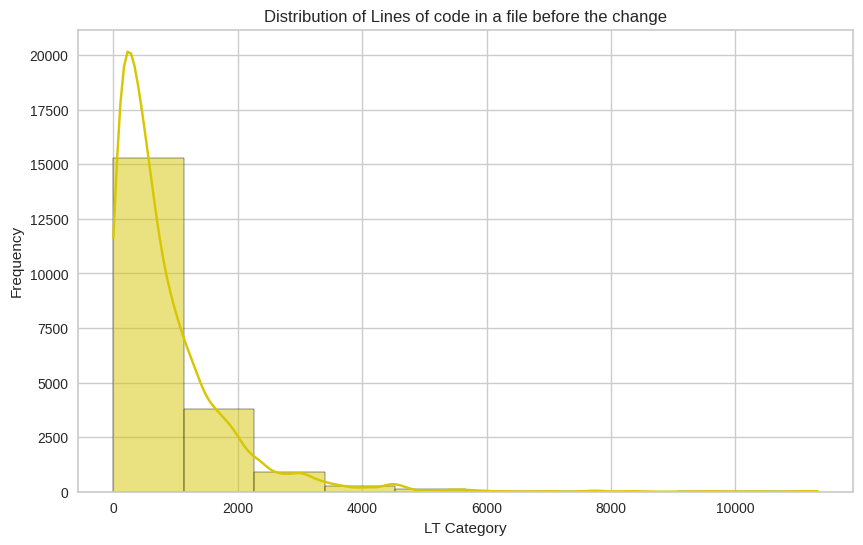

In [23]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['lt'], kde=True, color="y", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code in a file before the change')
plt.xlabel('LT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [24]:
df['fix'].unique()

array([0, 1])

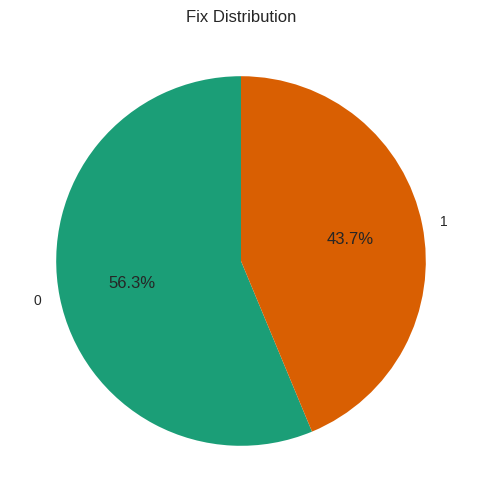

In [25]:
a=df['fix'].value_counts()

# Membuat pie diagram
plt.figure(figsize=(8, 6))
plt.pie(a, labels=a.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'), startangle=90)

# Menambahkan judul
plt.title('Fix Distribution')

# Menampilkan plot
plt.show()

In [26]:
df['ndev'].unique()

array([20,  2,  7,  3,  4,  5, 11, 14, 10,  9, 15,  8, 28, 23, 18, 16, 12,
       25, 21,  6, 17, 22, 13,  1, 24, 27, 19, 26])

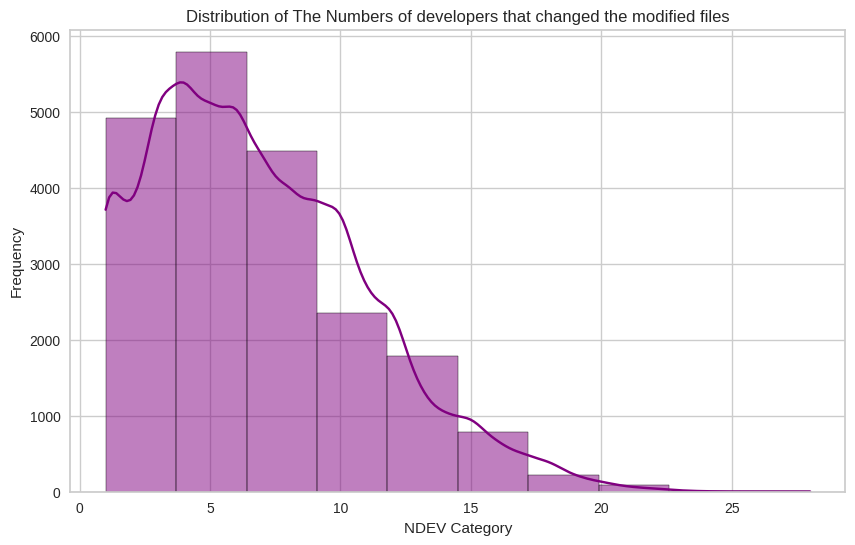

In [27]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ndev'], kde=True, color="purple", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of The Numbers of developers that changed the modified files')
plt.xlabel('NDEV Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [28]:
df['pd'].unique()

array([ 70706, 108260,      0, ...,   1271,    980,   1366])

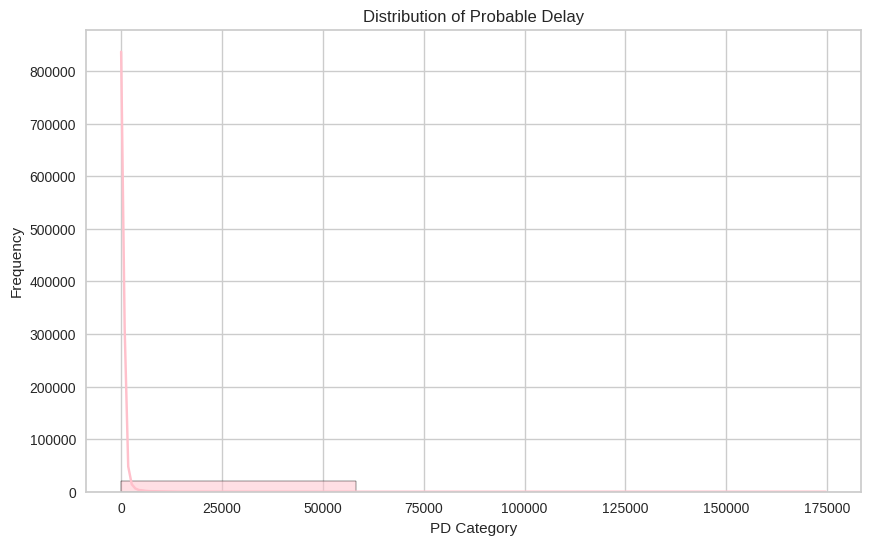

In [29]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="pink", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Probable Delay')
plt.xlabel('PD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [30]:
df['npt'].unique()

array([0.19596542, 0.28609271, 1.        , 0.5       , 0.33333333,
       0.75      , 0.56521739, 0.2       , 0.8       , 0.88888889,
       0.27091634, 0.125     , 0.22828283, 0.54545455, 0.66666667,
       0.28645833, 0.78125   , 0.48148148, 0.53333333, 0.21058965,
       0.625     , 0.25566751, 0.55555556, 0.46666667, 0.95238095,
       0.61111111, 0.65384615, 0.375     , 0.85      , 0.83333333,
       0.44444444, 0.07142857, 0.85714286, 0.42622951, 0.6       ,
       0.63157895, 0.57142857, 0.34375   , 0.41666667, 0.7       ,
       0.28571429, 0.5862069 , 0.58333333, 0.17971334, 0.72727273,
       0.3       , 0.58823529, 0.70588235, 0.81818182, 0.42307692,
       0.60714286, 0.25      , 0.27272727, 0.71428571, 0.19113573,
       0.73913043, 0.40625   , 0.52688172, 0.38709677, 0.40291262,
       0.33492823, 0.01162791, 0.00158228, 0.41193595, 0.44186046,
       0.33639144, 0.4       , 0.45454545, 0.31761787, 0.50877193,
       0.30973451, 0.16666667, 0.05555556, 0.15559772, 0.40259

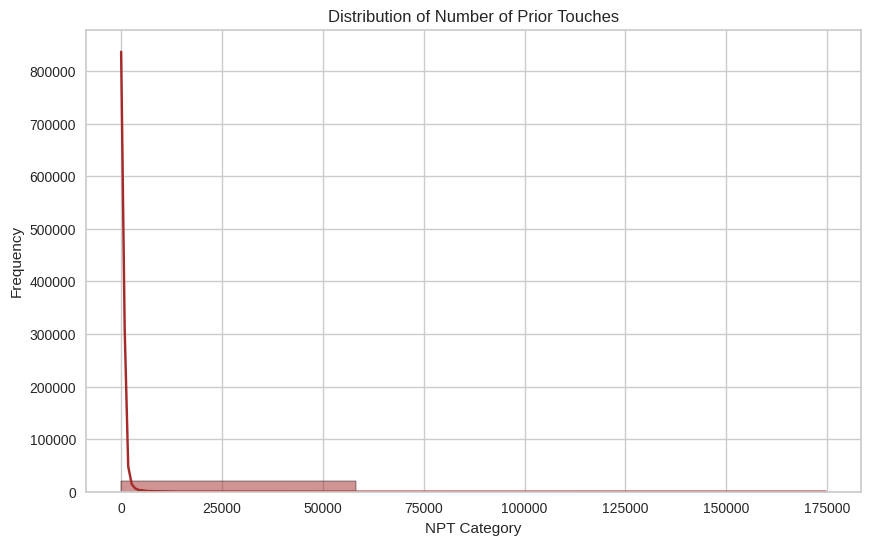

In [31]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="brown", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of Prior Touches')
plt.xlabel('NPT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

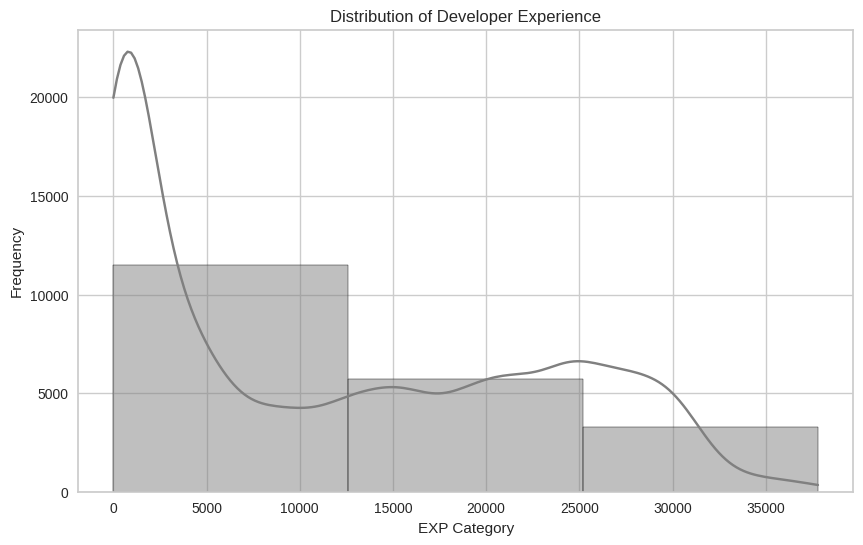

In [32]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['exp'], kde=True, color="gray", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience')
plt.xlabel('EXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

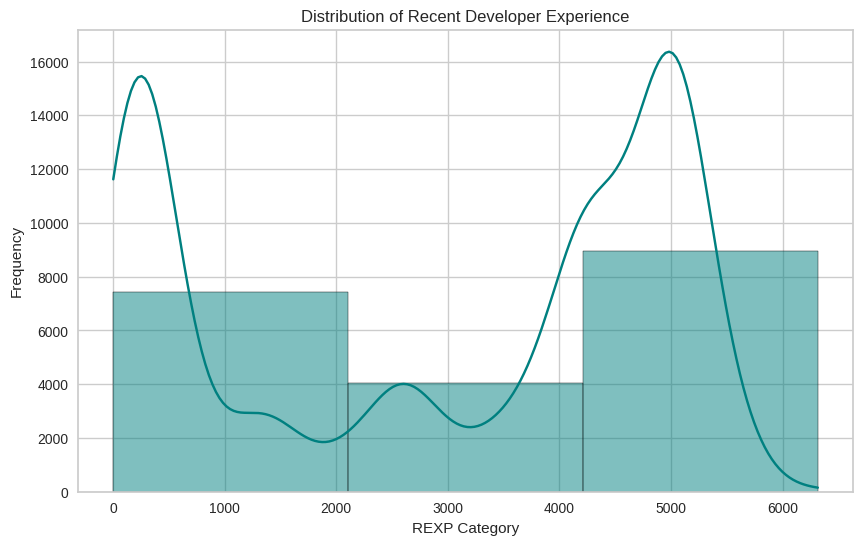

In [33]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['rexp'], kde=True, color="teal", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Recent Developer Experience')
plt.xlabel('REXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

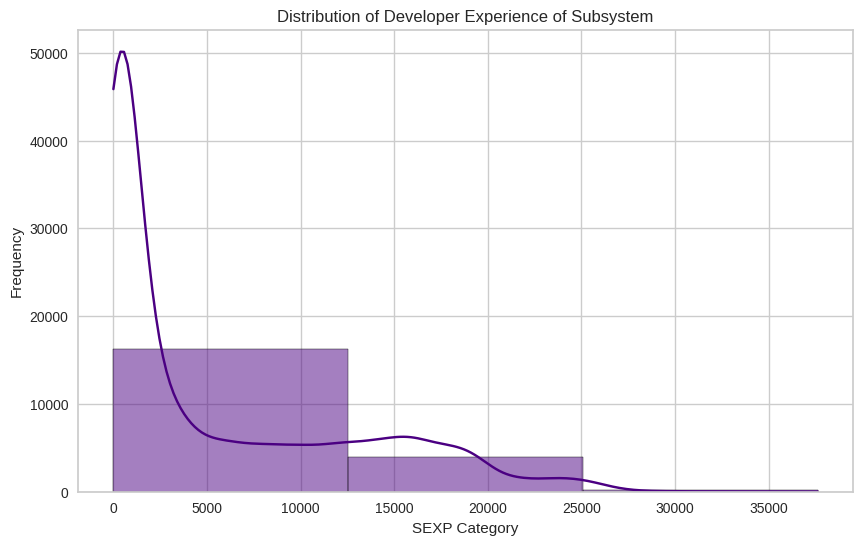

In [34]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['sexp'], kde=True, color="indigo", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience of Subsystem')
plt.xlabel('SEXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

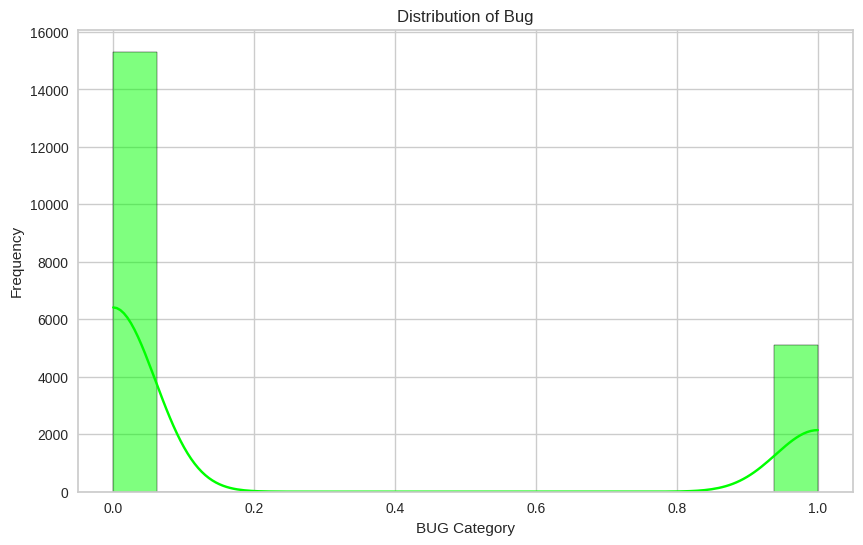

In [35]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['bug'], kde=True, color="lime")

# Menambahkan judul dan label sumbu
plt.title('Distribution of Bug')
plt.xlabel('BUG Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20431 entries, 0 to 20430
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  20431 non-null  int64  
 1   commitdate     20431 non-null  object 
 2   ns             20431 non-null  int64  
 3   nm             20431 non-null  int64  
 4   nf             20431 non-null  int64  
 5   entropy        20431 non-null  float64
 6   la             20431 non-null  float64
 7   ld             20431 non-null  float64
 8   lt             20431 non-null  float64
 9   fix            20431 non-null  int64  
 10  ndev           20431 non-null  int64  
 11  pd             20431 non-null  int64  
 12  npt            20431 non-null  float64
 13  exp            20431 non-null  int64  
 14  rexp           20431 non-null  float64
 15  sexp           20431 non-null  int64  
 16  bug            20431 non-null  int64  
dtypes: float64(6), int64(10), object(1)
memory usage: 

In [37]:
df.isna().sum()

,0
transactionid,0
commitdate,0
ns,0
nm,0
nf,0
entropy,0
la,0
ld,0
lt,0
fix,0


In [38]:
df.drop(['transactionid', 'commitdate'], axis=1, inplace=True)
df.head()

,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,10,107,694,0.999731,0.006990,0.006990,284.461095,0,20,70706,0.195965,1603,988.733333,1594,0
1,10,111,755,0.999520,0.006866,0.006866,288.600000,0,20,108260,0.286093,25822,4918.773409,25556,0
2,1,1,1,0.000000,0.025641,0.029915,234.000000,0,2,0,1.000000,13150,5202.438095,510,1
3,2,2,8,0.861654,6.000000,6.000000,0.000000,0,7,1230,0.500000,909,874.948718,107,0
4,1,1,1,0.000000,0.000000,0.000000,0.000000,0,3,298,1.000000,5076,521.867108,468,0


In [39]:
df['bug'].value_counts()

,count
bug,
0,15312
1,5119


#4. Training

In [40]:
clf = setup(
    data=df,
    target='bug',
    session_id=101,
    fix_imbalance=True,
    fix_imbalance_method='smote',
    fold=10,
    verbose=True
)

,Description,Value
0,Session id,101
1,Target,bug
2,Target type,Binary
3,Original data shape,"(20431, 15)"
4,Transformed data shape,"(27566, 15)"
5,Transformed train set shape,"(21436, 15)"
6,Transformed test set shape,"(6130, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [41]:
# 6. Bandingkan semua model dan ambil model terbaik
best_model = compare_models(sort='Accuracy', exclude=['dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8115,0.8303,0.5057,0.6626,0.5735,0.4553,0.4622,3.4160
gbc,Gradient Boosting Classifier,0.8030,0.8305,0.5671,0.6165,0.5906,0.4612,0.4621,6.7210
rf,Random Forest Classifier,0.8013,0.8163,0.5197,0.6254,0.5672,0.4398,0.4433,4.6780
xgboost,Extreme Gradient Boosting,0.8004,0.8171,0.5027,0.6271,0.5578,0.4309,0.4354,0.5070
et,Extra Trees Classifier,0.7906,0.7995,0.5077,0.5970,0.5485,0.4134,0.4159,2.3020
ada,Ada Boost Classifier,0.7887,0.8088,0.5582,0.5821,0.5695,0.4296,0.4301,1.8690
lr,Logistic Regression,0.7527,0.7787,0.5908,0.5056,0.5448,0.3764,0.3787,2.1520
ridge,Ridge Classifier,0.7353,0.7397,0.5850,0.4772,0.5255,0.3446,0.3481,0.1110
lda,Linear Discriminant Analysis,0.7353,0.7397,0.5850,0.4773,0.5256,0.3447,0.3482,0.1390
dt,Decision Tree Classifier,0.7282,0.6595,0.5208,0.4631,0.4901,0.3058,0.3068,0.4620


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [42]:
lightgbm= create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8239,0.8463,0.5153,0.7034,0.5949,0.4858,0.4954
1,0.8140,0.8243,0.5000,0.6729,0.5737,0.4580,0.4663
2,0.8021,0.8337,0.4944,0.6344,0.5557,0.4309,0.4365
3,0.8000,0.8183,0.4888,0.6295,0.5503,0.4243,0.4299
4,0.8280,0.8462,0.5279,0.7105,0.6058,0.4988,0.5078
5,0.7986,0.8269,0.4916,0.6241,0.5500,0.4226,0.4276
6,0.8084,0.8263,0.5112,0.6489,0.5719,0.4507,0.4560
7,0.8077,0.8300,0.4832,0.6578,0.5572,0.4380,0.4465
8,0.8126,0.8256,0.5153,0.6631,0.5799,0.4618,0.4678


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
# 7. Finalisasi model terbaik
final_model = finalize_model(lightgbm)

In [44]:
# 8. Evaluasi model dengan berbagai plot
evaluate_model(final_model)  # akan menampilkan GUI dengan berbagai evaluasi (ROC, Confusion Matrix, dll)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [45]:
# 9. Simpan model ke Google Drive
model_path = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/Cross Project Defect Prediction/Model/postgres_best_model'
save_model(final_model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ns', 'nm', 'nf', 'entropy', 'la',
                                              'ld', 'lt', 'fix', 'ndev', 'pd',
                                              'npt', 'exp', 'rexp', 'sexp'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer'...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                      